# Create treatment_probabilities figure

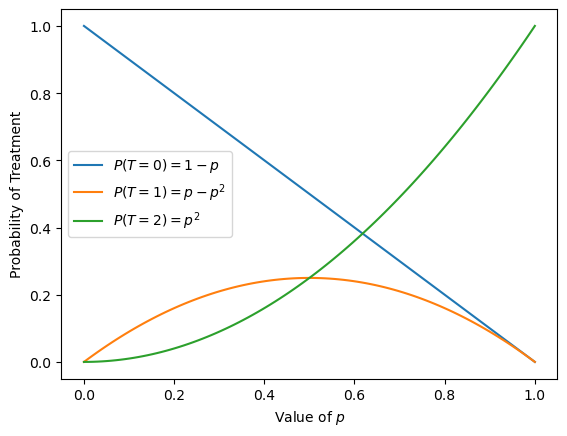

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and axis
fig, ax = plt.subplots()
f_1_minus_p = lambda p: 1 - p
f_p_minus_p_squared = lambda p: p - p ** 2
f_p_squared = lambda p: p ** 2

# Create a range of values for p
p = np.linspace(0, 1, 100)

# Plot the functions
ax.plot(p, f_1_minus_p(p), label="$P(T=0)=1-p$")
ax.plot(p, f_p_minus_p_squared(p), label="$P(T=1)=p-p^2$")
ax.plot(p, f_p_squared(p), label="$P(T=2)=p^2$")

# Add a legend
ax.legend()
# plt.grid(True)
# Add suptitle
# plt.suptitle("Treatment Probabilities")

plt.xlabel("Value of $p$")
plt.ylabel("Probability of Treatment")

# Show the plot
plt.savefig("SUMO_figures/treatment_probabilities.png")

In [17]:
import pandas as pd
import numpy as np

def _create_vehicle_amounts(size):
    """ Create the vehicle expected amounts for each time period according to the grow and decay rates """
    grow_rates = [1, 1.2, 1.4, 1.6, 1.8, 2.0]
    decay_rates = [2.0, 1.8, 1.6, 1.4, 1.2, 1.0]
    # every key stands for 10 min
    veh_amounts = {i: size * grow_rate for i, grow_rate in enumerate(grow_rates)}
    veh_amounts.update({i + 6: size * decay_rate for i, decay_rate in enumerate(decay_rates)})
    return veh_amounts

# Create a barplot of the demand at each route
demand = 180
junctions = ["West","North","East","South"]
veh_amounts = _create_vehicle_amounts(demand)

demands = {f"{j1} to {j2}": [] for j1 in junctions for j2 in junctions if j1 != j2}

for hour, hour_demand in veh_amounts.items():
    for junction in junctions:
        junc_demand = hour_demand * np.random.uniform(0.8, 1.2)
        out_probs = np.random.uniform(0, 1, len(junctions) - 1) # randomize the destination probabilities
        out_probs = out_probs / out_probs.sum()
        i = 0
        for out_junc in junctions:
            if junction == out_junc:
                continue
            else:
                demands[f"{junction} to {out_junc}"].append(junc_demand * out_probs[i])
                i += 1
demands_df = pd.DataFrame(demands)

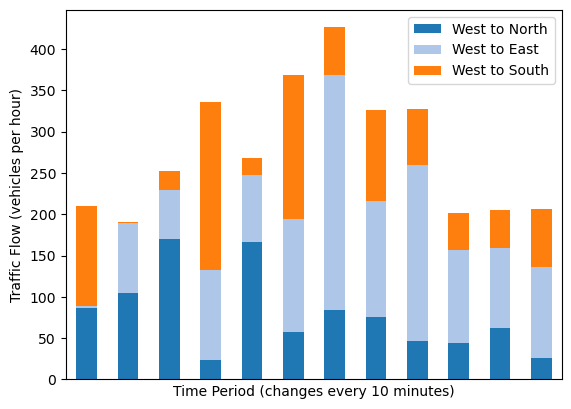

In [21]:
# create one barplot of all routes through the day
import matplotlib.pyplot as plt
W_cols = [col for col in demands_df.columns if col.startswith("W")]
# change color palette to colorblind friendly
demands_df[W_cols].plot(kind="bar", stacked=True, color=plt.cm.tab20.colors)
# plt.title("Vehicle Demand from West Junction")
plt.xlabel("Time Period (changes every 10 minutes)")
plt.ylabel("Traffic Flow (vehicles per hour)")
plt.xticks([])
plt.savefig("SUMO_figures/vehicle_demand.png")